In [1]:
%matplotlib inline
import os, shutil
import sys
sys.path.append("..")
import numpy as np
from IPython.display import Image
import pandas as pd
import matplotlib.pyplot as plt

import flopy as flopy
import pyemu

In [2]:
import freyberg_setup as fs
fs.setup_pest_pp()
working_dir = fs.WORKING_DIR_PP
pst_name = fs.PST_NAME_PP

['.DS_Store', 'botm.ref', 'extract_zone_array.py', 'forecasts_true.csv', 'freyberg.bas', 'freyberg.dbf', 'freyberg.dis', 'freyberg.hds', 'freyberg.heads', 'freyberg.heads_potobs.ins', 'freyberg.hyd', 'freyberg.list', 'freyberg.locations', 'freyberg.mpbas', 'freyberg.mpenpt', 'freyberg.mplist', 'freyberg.mpnam', 'freyberg.mppthln', 'freyberg.mpsim', 'freyberg.oc', 'freyberg.pcg', 'freyberg.rivflux', 'freyberg.shp', 'freyberg.shx', 'freyberg.travel', 'freyberg.truth.lpf', 'freyberg.truth.nam', 'freyberg.truth.rch', 'freyberg.truth.riv', 'freyberg.truth.wel', 'hk.truth.ref', 'hk.zones', 'ibound.ref', 'kzone.ref', 'mpath.in', 'obs_loc.csv', 'potobs_group.csv', 'Process_output.py', 'run_true_model.py', 'strt.ref', 'Weights_and_best_PHI.xlsx']

changing model workspace...
   freyberg_pp
FloPy is using the following executable to run the model: /Users/jwhite/Dev/GW1876/activities/freyberg_pilot_points_1/freyberg_pp/mfnwt

                                  MODFLOW-NWT-SWR1 
    U.S. GEOLOGICAL

In [3]:
pst = pyemu.Pst(os.path.join(working_dir,pst_name))
pst.control_data.noptmax

8

In [4]:
pst.pestpp_options

{'forecasts': 'fr03c10_19750102,fr03c16_19750102,fr04c09_19750102,fr10c02_19750102,fr14c11_19750102,fr16c17_19750102,fr22c11_19750102,fr23c16_19750102,fr25c05_19750102,fr27c07_19750102,fr30c16_19750102,fr34c08_19750102,fr35c11_19750102,flx_river_l_19750102,travel_time',
 'lambda_scale_fac': '1.0',
 'lambdas': '0.1,1.0,10.0',
 'n_iter_base': '-1',
 'n_iter_super': '3',
 'upgrade_augment': 'false'}

In [5]:
os.chdir(working_dir)
pyemu.helpers.start_slaves('.',"pestpp",pst_name,num_slaves=15,master_dir='.')
os.chdir('..')

master:./pestpp freyberg_pp.pst /h :4004 in .
slave:./pestpp freyberg_pp.pst /h localhost:4004 in ../slave_0
slave:./pestpp freyberg_pp.pst /h localhost:4004 in ../slave_1
slave:./pestpp freyberg_pp.pst /h localhost:4004 in ../slave_2
slave:./pestpp freyberg_pp.pst /h localhost:4004 in ../slave_3
slave:./pestpp freyberg_pp.pst /h localhost:4004 in ../slave_4
slave:./pestpp freyberg_pp.pst /h localhost:4004 in ../slave_5
slave:./pestpp freyberg_pp.pst /h localhost:4004 in ../slave_6
slave:./pestpp freyberg_pp.pst /h localhost:4004 in ../slave_7
slave:./pestpp freyberg_pp.pst /h localhost:4004 in ../slave_8
slave:./pestpp freyberg_pp.pst /h localhost:4004 in ../slave_9
slave:./pestpp freyberg_pp.pst /h localhost:4004 in ../slave_10
slave:./pestpp freyberg_pp.pst /h localhost:4004 in ../slave_11
slave:./pestpp freyberg_pp.pst /h localhost:4004 in ../slave_12
slave:./pestpp freyberg_pp.pst /h localhost:4004 in ../slave_13
slave:./pestpp freyberg_pp.pst /h localhost:4004 in ../slave_14


In [6]:
pst.phi

116.37900887220806

In [7]:
pst.res.loc[pst.nnz_obs_names,:]

,name,group,measured,modelled,residual,weight
name,,,,,,
flx_river_l_19700102,flx_river_l_19700102,calflux,-3706.027000,-3709.158203,3.131203,0.1
cr03c10_19700102,cr03c10_19700102,calhead,22.331451,22.350948,-0.019497,5.0
cr03c16_19700102,cr03c16_19700102,calhead,18.526869,19.585775,-1.058906,5.0
cr04c09_19700102,cr04c09_19700102,calhead,24.412637,24.381527,0.031110,5.0
cr10c02_19700102,cr10c02_19700102,calhead,27.985834,27.995070,-0.009235,5.0
cr14c11_19700102,cr14c11_19700102,calhead,21.070509,21.098742,-0.028233,5.0
cr16c17_19700102,cr16c17_19700102,calhead,15.468176,16.379965,-0.911789,5.0
cr22c11_19700102,cr22c11_19700102,calhead,20.485881,20.496498,-0.010617,5.0
cr23c16_19700102,cr23c16_19700102,calhead,15.308345,15.247609,0.060736,5.0


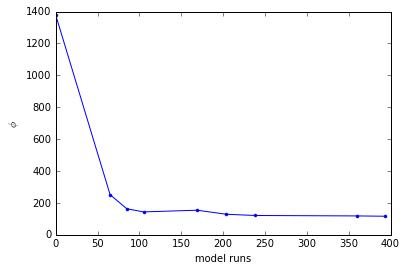

In [8]:
df = pd.read_csv(os.path.join(working_dir,pst_name.replace(".pst",".iobj")))
ax = plt.subplot(111)
ax.plot(df.model_runs_completed,df.total_phi,marker='.')
ax.set_xlabel("model runs")
ax.set_ylabel("$\phi$")

(10.0, 30.0)

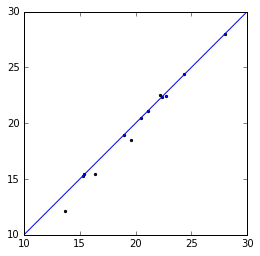

In [9]:
ax = plt.subplot(111,aspect="equal") 
wl_names = [n for n in pst.nnz_obs_names if n.startswith("c")]
ax.scatter(pst.res.loc[wl_names,"modelled"],pst.res.loc[wl_names,"measured"],marker='.')
ylim,xlim = ax.get_ylim(),ax.get_xlim()
mn = min(ylim[0],xlim[0])
mx = max(ylim[1],xlim[1])
ax.plot([mn,mx],[mn,mx])
ax.set_ylim(mn,mx)
ax.set_xlim(mn,mx)

Sweet!  We nailed the heads!  This must be the perfect model in every way!  But, before we finalize the report, let's check out the parameter values:

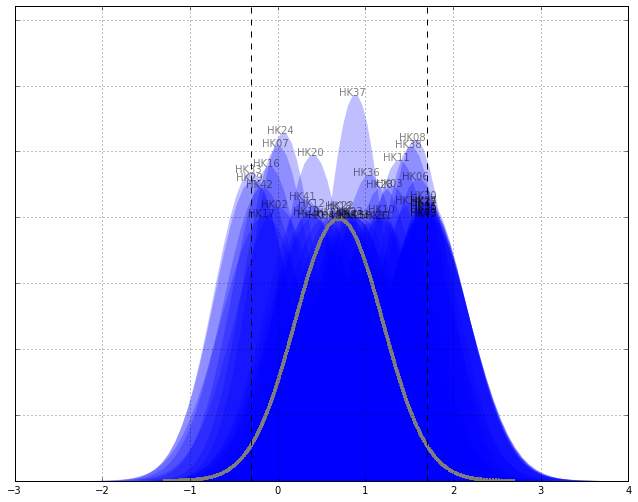

In [10]:
df_paru = pd.read_csv(os.path.join(working_dir,pst_name.replace(".pst",".par.usum.csv")),index_col=0)
hk_pars = [p.upper() for p in pst.par_names if p.startswith("hk")]
df_hk = df_paru.loc[hk_pars,:]
ax = pyemu.helpers.plot_summary_distributions(df_hk,label_post=True)
mn = np.log10(pst.parameter_data.loc[hk_pars[0].lower(),"parlbnd"])
mx = np.log10(pst.parameter_data.loc[hk_pars[0].lower(),"parubnd"])
ax.plot([mn,mn],ax.get_ylim(),"k--")
ax.plot([mx,mx],ax.get_ylim(),"k--")

Lots of HK pars at their bounds...not a good sign

In [11]:
os.chdir(working_dir)
pst.parrep(pst_name.replace(".pst",".parb"))
pyemu.pst_utils.write_parvals_in_tplfiles(pst)
pyemu.gw_utils.fac2real("hkpp.dat",factors_file="hkpp.dat.fac",out_file="hk_layer_1.ref")
os.chdir("..")

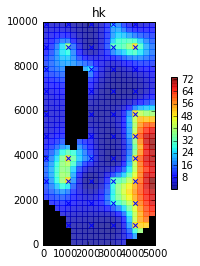

In [12]:
df_pp = pyemu.gw_utils.pp_tpl_to_dataframe(os.path.join(working_dir,"hkpp.dat.tpl"))
m = flopy.modflow.Modflow.load(fs.MODEL_NAM,model_ws=working_dir)
ax = m.upw.hk[0].plot(colorbar=True,alpha=0.5)
ax.scatter(df_pp.x,df_pp.y,marker='x')

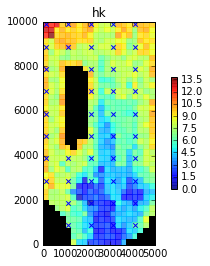

In [13]:
m.upw.hk[0] = os.path.join(fs.BASE_MODEL_DIR,"hk.truth.ref")
ax = m.upw.hk[0].plot(colorbar=True,alpha=0.5)
ax.scatter(df_pp.x,df_pp.y,marker='x')

Something is wrong...how does the calibrated HK field have so much more variability than the "truth"?  We better checkout the forecasts:

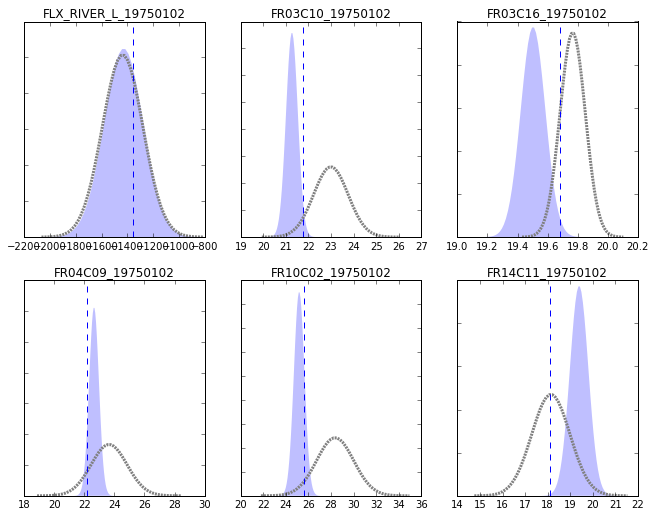

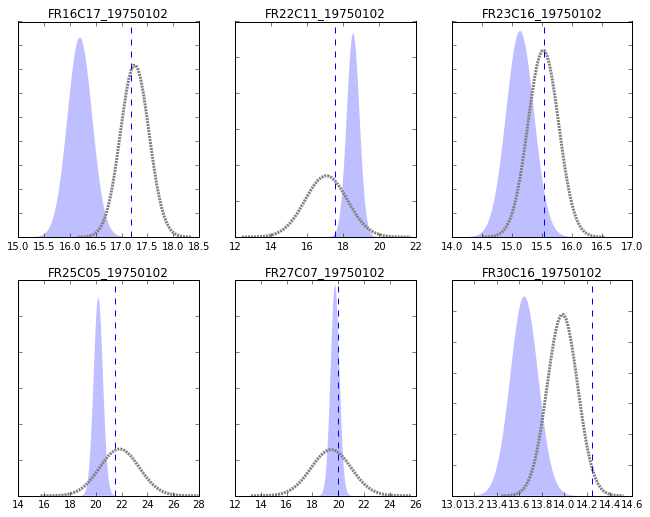

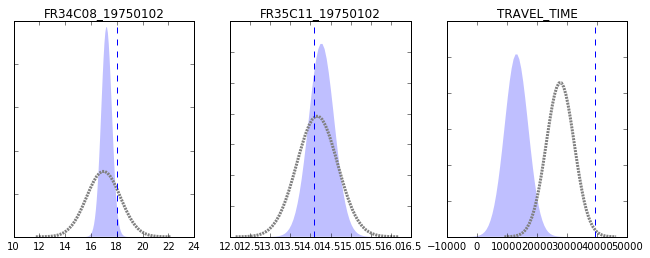

In [14]:
figs, axes = pyemu.helpers.plot_summary_distributions(os.path.join(working_dir,
                    pst_name.replace(".pst",".pred.usum.csv")),subplots=True)
for ax in axes:
    fname = ax.get_title().lower()
    ylim = ax.get_ylim()
    v = pst.observation_data.loc[fname,"obsval"]
    ax.plot([v,v],ylim,"b--")
    ax.set_ylim(ylim)

Doh! We are way off for lots of forecasts (compared to the "truth").  So what happened?  Answer: overfitting: we specified lots of parameters, so we are able to fit the observations really well - too well.  Even though we are able to measure water levels very precisely, the model has problems (model error), so we shouldn't expect the model to reproduce the observations so well.  But how do we control this overfitting??? 